In [35]:
import pandas as pd
import plotly.express as px

In [36]:
# Load the Excel files
df_1 = pd.read_excel(r"elevator_1.xlsx")
df_2 = pd.read_excel(r"elevator_2.xlsx")

In [21]:
df_2.columns

Index(['device_id', 'unit_id', 'log_timestamp', 'received_time',
       'firmware_version', 'product_code', 'serial_code', 'move_count',
       'vertical_distance_traveled', 'horizontal_move_count',
       'horizontal_distance_traveled', 'barometric_pressure',
       'movement_direction', 'movement_duration', 'distance_moved',
       'is_move_valid', 'final_move_state', 'pressure_before_move',
       'pressure_after_move', 'pressure_difference', 'duration_acceleration',
       'acceleration_peak', 'duration_cruise', 'cruise_peak',
       'duration_deceleration', 'signal_strength', 'battery_voltage',
       'temperature_board', 'temperature_processor', 'start_floor',
       'end_floor'],
      dtype='object')

In [37]:
# Applying the direction renaming logic to df_1
df_1["movement_direction"] = df_1['movement_direction'].apply(
    lambda x: "Up" if x == 1 else "Down" if x == 3 else "Open" if x == 5 else "Close" if x == 7 else x)

# Applying the direction renaming logic to df_2
df_2["movement_direction"] = df_2['movement_direction'].apply(
    lambda x: "Up" if x == 1 else "Down" if x == 3 else "Open" if x == 5 else "Close" if x == 7 else x)


   unit_id  parking_floor
0    16141            3.0


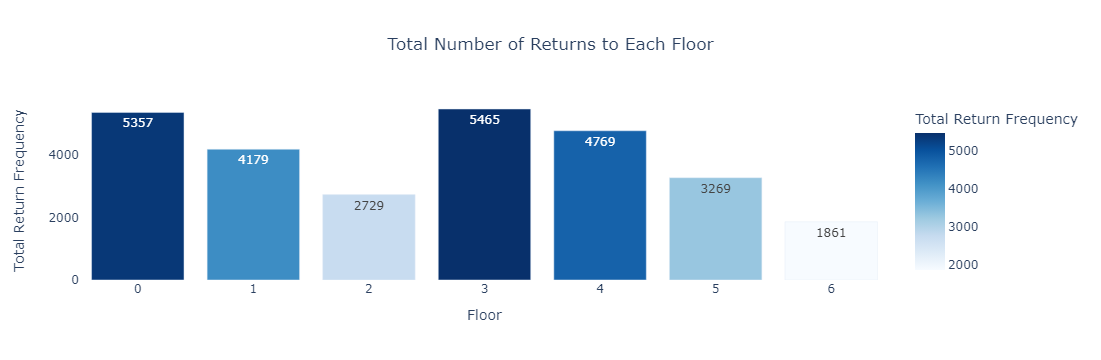

In [38]:
import pandas as pd
import plotly.express as px

# Convert the received_time column to datetime format
df_1['received_time'] = pd.to_datetime(df_1['received_time'])

# Sort by elevator ID and timestamp
df_1 = df_1.sort_values(by=['unit_id', 'received_time'])

# Filter out rows with invalid floor data
df_1 = df_1[(df_1['start_floor'] != -1) & (df_1['end_floor'] != -1)]

# Determine the time difference between consecutive rows
df_1['time_diff'] = df_1.groupby('unit_id')['received_time'].diff().dt.total_seconds()

# Assume a threshold for inactivity (e.g., 5 minutes = 300 seconds)
inactivity_threshold = 300

# Identify periods of inactivity
df_1['is_inactive'] = df_1['time_diff'] > inactivity_threshold

# Shift the 'end_floor' to the previous row to get the floor the elevator moves to after inactivity
df_1['next_floor_after_inactivity'] = df_1['end_floor'].shift(-1)

# Filter out rows where the elevator is stationary at the same floor
df_1 = df_1[~(df_1['end_floor'] == df_1['next_floor_after_inactivity'])]

# Filter only rows where inactivity is identified
inactive_df = df_1[df_1['is_inactive']]

# Group by elevator ID and find the most frequent 'next_floor_after_inactivity'
parking_floors = inactive_df.groupby('unit_id')['next_floor_after_inactivity'].agg(lambda x: x.mode()[0]).reset_index()
parking_floors.columns = ['unit_id', 'parking_floor']

# Display the identified parking floors
print(parking_floors)

# Calculate the frequency of returns to each floor (excluding idle times)
return_frequencies = df_1.groupby(['end_floor', 'start_floor']).size().reset_index(name='count')

# Summarize the total number of returns to each floor
total_returns = return_frequencies.groupby('end_floor')['count'].sum().reset_index(name='total_count')

# Create a bar plot to visualize the total number of returns to each floor
fig = px.bar(total_returns,
             x='end_floor',
             y='total_count',
             title='Total Number of Returns to Each Floor',
             labels={'end_floor': 'Floor', 'total_count': 'Total Return Frequency'},
             text='total_count',  # Display total count on bars
             color='total_count',  # Color based on the frequency
             color_continuous_scale='Blues',  # Custom color palette
             hover_name='end_floor',  # Display floor number on hover
             hover_data={'end_floor': False, 'total_count': ':.0f'}  # Format hover data
             )

# Update layout for better visualization
fig.update_layout(xaxis_title='Floor',
                  yaxis_title='Total Return Frequency',
                  title={'x': 0.5},
                  uniformtext_minsize=8,  # Minimum font size for text on bars
                  uniformtext_mode='hide',  # Hide text if it doesn't fit
                  plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")  # Custom hover label
                  )

# Display the plot
fig.show()

# Save the plot as HTML
fig.write_html('elev_1_cuml_rides_parking_floor_3.html')


   unit_id  parking_floor
0    16144            1.0


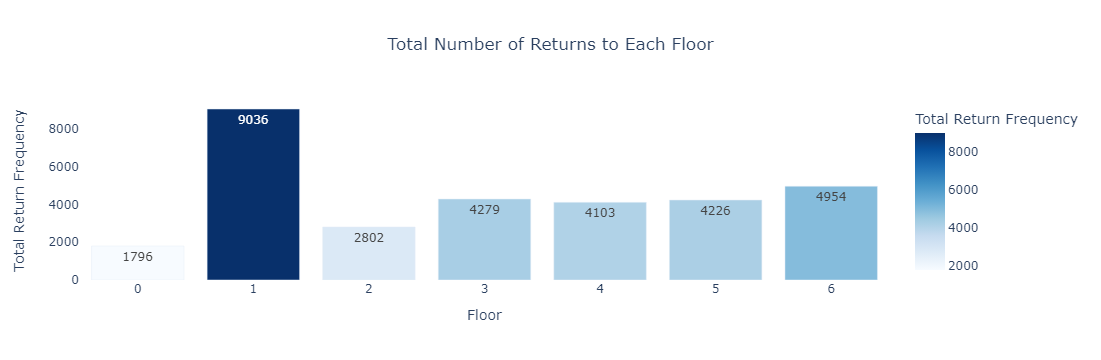

In [40]:
import pandas as pd
import plotly.express as px

# Convert the received_time column to datetime format
df_2['received_time'] = pd.to_datetime(df_2['received_time'])

# Sort by elevator ID and timestamp
df_2 = df_2.sort_values(by=['unit_id', 'received_time'])

# Filter out rows with invalid floor data
df_2 = df_2[(df_2['start_floor'] != -1) & (df_2['end_floor'] != -1)]

# Determine the time difference between consecutive rows
df_2['time_diff'] = df_2.groupby('unit_id')['received_time'].diff().dt.total_seconds()

# Assume a threshold for inactivity (e.g., 5 minutes = 300 seconds)
inactivity_threshold = 300

# Identify periods of inactivity
df_2['is_inactive'] = df_2['time_diff'] > inactivity_threshold

# Shift the 'end_floor' to the previous row to get the floor the elevator moves to after inactivity
df_2['next_floor_after_inactivity'] = df_2['end_floor'].shift(-1)

# Filter out rows where the elevator is stationary at the same floor
df_2 = df_2[~(df_2['end_floor'] == df_2['next_floor_after_inactivity'])]

# Filter only rows where inactivity is identified
inactive_df = df_2[df_2['is_inactive']]

# Group by elevator ID and find the most frequent 'next_floor_after_inactivity'
parking_floors = inactive_df.groupby('unit_id')['next_floor_after_inactivity'].agg(lambda x: x.mode()[0]).reset_index()
parking_floors.columns = ['unit_id', 'parking_floor']

# Display the identified parking floors
print(parking_floors)

# Calculate the frequency of returns to each floor (excluding idle times)
return_frequencies = df_2.groupby(['end_floor', 'start_floor']).size().reset_index(name='count')

# Summarize the total number of returns to each floor
total_returns = return_frequencies.groupby('end_floor')['count'].sum().reset_index(name='total_count')

# Create a bar plot to visualize the total number of returns to each floor
fig = px.bar(total_returns,
             x='end_floor',
             y='total_count',
             title='Total Number of Returns to Each Floor',
             labels={'end_floor': 'Floor', 'total_count': 'Total Return Frequency'},
             text='total_count',  # Display total count on bars
             color='total_count',  # Color based on the frequency
             color_continuous_scale='Blues',  # Custom color palette
             hover_name='end_floor',  # Display floor number on hover
             hover_data={'end_floor': False, 'total_count': ':.0f'}  # Format hover data
             )

# Update layout for better visualization
fig.update_layout(xaxis_title='Floor',
                  yaxis_title='Total Return Frequency',
                  title={'x': 0.5},
                  uniformtext_minsize=8,  # Minimum font size for text on bars
                  uniformtext_mode='hide',  # Hide text if it doesn't fit
                  plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")  # Custom hover label
                  )

# Display the plot
fig.show()

# Save the plot as HTML
fig.write_html('elev_2_cuml_rides_parking_floor_1.html')


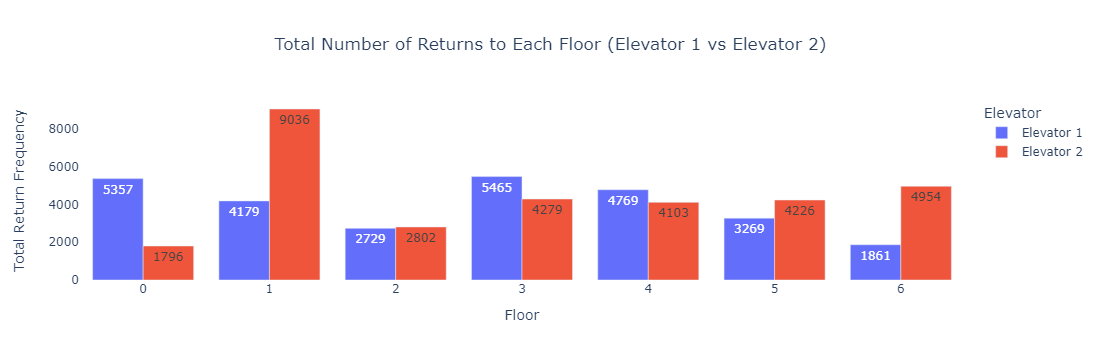

In [43]:
import pandas as pd
import plotly.express as px

# Convert the received_time column to datetime format
df_1['received_time'] = pd.to_datetime(df_1['received_time'])
df_2['received_time'] = pd.to_datetime(df_2['received_time'])

# Sort by elevator ID and timestamp
df_1 = df_1.sort_values(by=['unit_id', 'received_time'])
df_2 = df_2.sort_values(by=['unit_id', 'received_time'])

# Filter out rows with invalid floor data
df_1 = df_1[(df_1['start_floor'] != -1) & (df_1['end_floor'] != -1)]
df_2 = df_2[(df_2['start_floor'] != -1) & (df_2['end_floor'] != -1)]

# Determine the time difference between consecutive rows
df_1['time_diff'] = df_1.groupby('unit_id')['received_time'].diff().dt.total_seconds()
df_2['time_diff'] = df_2.groupby('unit_id')['received_time'].diff().dt.total_seconds()

# Assume a threshold for inactivity (e.g., 5 minutes = 300 seconds)
inactivity_threshold = 300

# Identify periods of inactivity
df_1['is_inactive'] = df_1['time_diff'] > inactivity_threshold
df_2['is_inactive'] = df_2['time_diff'] > inactivity_threshold

# Shift the 'end_floor' to the previous row to get the floor the elevator moves to after inactivity
df_1['next_floor_after_inactivity'] = df_1['end_floor'].shift(-1)
df_2['next_floor_after_inactivity'] = df_2['end_floor'].shift(-1)

# Filter out rows where the elevator is stationary at the same floor
df_1 = df_1[~(df_1['end_floor'] == df_1['next_floor_after_inactivity'])]
df_2 = df_2[~(df_2['end_floor'] == df_2['next_floor_after_inactivity'])]

# Filter only rows where inactivity is identified
inactive_df_1 = df_1[df_1['is_inactive']]
inactive_df_2 = df_2[df_2['is_inactive']]

# Calculate the frequency of returns to each floor (excluding idle times)
return_frequencies_1 = df_1.groupby(['end_floor', 'start_floor']).size().reset_index(name='count')
return_frequencies_2 = df_2.groupby(['end_floor', 'start_floor']).size().reset_index(name='count')

# Summarize the total number of returns to each floor
total_returns_1 = return_frequencies_1.groupby('end_floor')['count'].sum().reset_index(name='total_count')
total_returns_2 = return_frequencies_2.groupby('end_floor')['count'].sum().reset_index(name='total_count')

# Add a column to distinguish the data source
total_returns_1['elevator'] = 'Elevator 1'
total_returns_2['elevator'] = 'Elevator 2'

# Combine both dataframes
combined_returns = pd.concat([total_returns_1, total_returns_2])

# Create a side-by-side bar plot
fig = px.bar(combined_returns,
             x='end_floor',
             y='total_count',
             color='elevator',
             barmode='group',
             title='Total Number of Returns to Each Floor (Elevator 1 vs Elevator 2)',
             labels={'end_floor': 'Floor', 'total_count': 'Total Return Frequency', 'elevator': 'Elevator'},
             text='total_count',  # Display total count on bars
             hover_name='elevator',  # Display elevator on hover
             hover_data={'elevator': False, 'total_count': ':.0f'}  # Format hover data
             )

# Update layout for better visualization
fig.update_layout(xaxis_title='Floor',
                  yaxis_title='Total Return Frequency',
                  title={'x': 0.5},
                  uniformtext_minsize=8,  # Minimum font size for text on bars
                  uniformtext_mode='hide',  # Hide text if it doesn't fit
                  plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")  # Custom hover label
                  )

# Display the plot
fig.show()

# Save the plot as HTML
fig.write_html('combined_bar_plot.html')


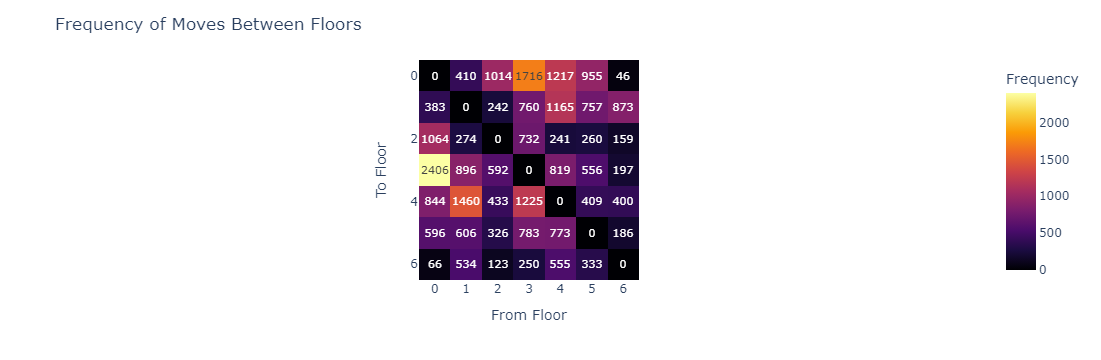

In [44]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = r"elevator_1.xlsx"
df_1 = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter out rows with invalid floor data
df_1 = df_1[(df_1['start_floor'] != -1) & (df_1['end_floor'] != -1)]

# Add condition to exclude movements from the same floor
df_1 = df_1[df_1['start_floor'] != df_1['end_floor']]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df_1['start_floor'], df_1['end_floor'])

# Sort the index (start_floor) in ascending order
pivot_table = pivot_table.reindex(index=sorted(pivot_table.index))

# Create a heatmap using the pivot table
fig = px.imshow(pivot_table.T,  # Transpose the pivot table to swap x and y
                labels=dict(x="From Floor", y="To Floor", color="Frequency"),
                x=pivot_table.index,  # Use the sorted index as x-axis
                y=pivot_table.columns,  # Use the columns as y-axis
                text_auto=True,  # Show the count in each cell
                color_continuous_scale='Inferno')  # Use a more distinct color palette

# Update layout for better readability
fig.update_layout(title="Frequency of Moves Between Floors",
                  xaxis_title="From Floor",
                  yaxis_title="To Floor",
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1))  # Set x-axis tick marks to start from 0 and increment by 1

fig.show()
fig.write_html('elev_1_freq_analysis_parking_floor_3.html')


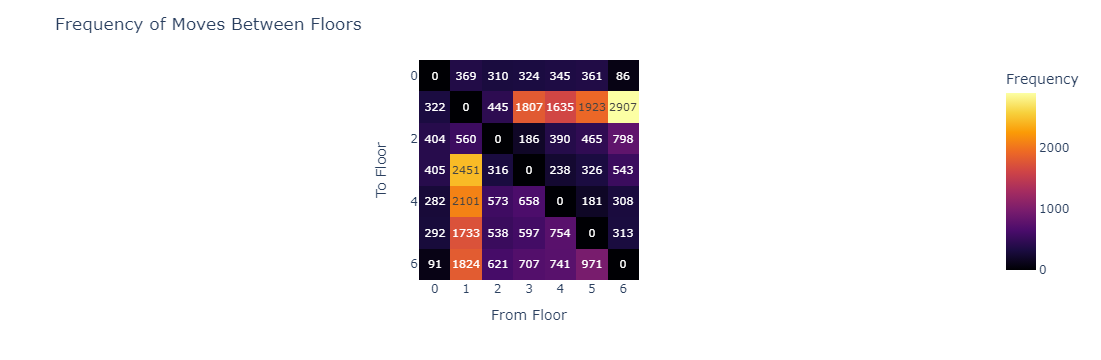

In [45]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = r"elevator_2.xlsx"
df_2 = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter out rows with invalid floor data
df_2 = df_2[(df_2['start_floor'] != -1) & (df_2['end_floor'] != -1)]

# Add condition to exclude movements from the same floor
df_2 = df_2[df_2['start_floor'] != df_2['end_floor']]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df_2['start_floor'], df_2['end_floor'])

# Sort the index (start_floor) in ascending order
pivot_table = pivot_table.reindex(index=sorted(pivot_table.index))

# Create a heatmap using the pivot table
fig = px.imshow(pivot_table.T,  # Transpose the pivot table to swap x and y
                labels=dict(x="From Floor", y="To Floor", color="Frequency"),
                x=pivot_table.index,  # Use the sorted index as x-axis
                y=pivot_table.columns,  # Use the columns as y-axis
                text_auto=True,  # Show the count in each cell
                color_continuous_scale='Inferno')  # Use a more distinct color palette

# Update layout for better readability
fig.update_layout(title="Frequency of Moves Between Floors",
                  xaxis_title="From Floor",
                  yaxis_title="To Floor",
                  xaxis=dict(tickmode='linear', tick0=0,
                             dtick=1))  # Set x-axis tick marks to start from 0 and increment by 1

fig.show()
fig.write_html('elev_2_freq_analysis_parking_floor_1.html')


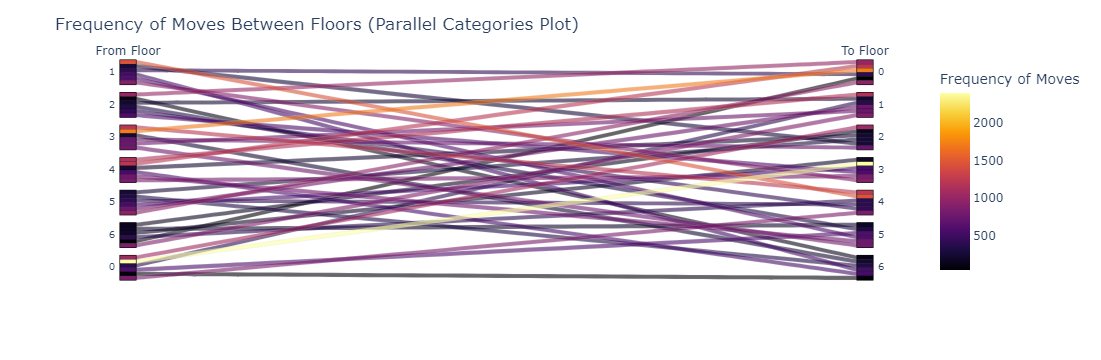

In [46]:
import pandas as pd
import plotly.express as px

# Assuming df_1 is already loaded with the data
df = df_1

# Filter out rows with invalid floor values and exclude movements from the same floor
df = df[(df['start_floor'] != -1) & (df['end_floor'] != -1) & (df['start_floor'] != df['end_floor'])]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df['start_floor'], df['end_floor'])

# Melt the pivot table to create the long format data
parallel_data = pivot_table.reset_index().melt(id_vars='start_floor', value_vars=pivot_table.columns,
                                               var_name='end_floor', value_name='frequency')

# Filter out zero frequencies for cleaner plot
parallel_data = parallel_data[parallel_data['frequency'] > 0]

# Create a parallel categories plot
fig_parallel_cat = px.parallel_categories(parallel_data,
                                          dimensions=['start_floor', 'end_floor'],
                                          color="frequency",
                                          color_continuous_scale='Inferno',
                                          labels={'start_floor': 'From Floor', 'end_floor': 'To Floor',
                                                  'frequency': 'Frequency of Moves'})

# Update layout for better readability and customize hover text
fig_parallel_cat.update_layout(title="Frequency of Moves Between Floors (Parallel Categories Plot)",
                               hoverlabel=dict(
                                   bgcolor="white",
                                   font_size=12,
                                   font_family="Rockwell",
                                   bordercolor="black"
                               ))

# Show the parallel categories plot
fig_parallel_cat.show()
fig_parallel_cat.write_html('elev_1_freq_analysis_parking_floor_3(sankey).html')


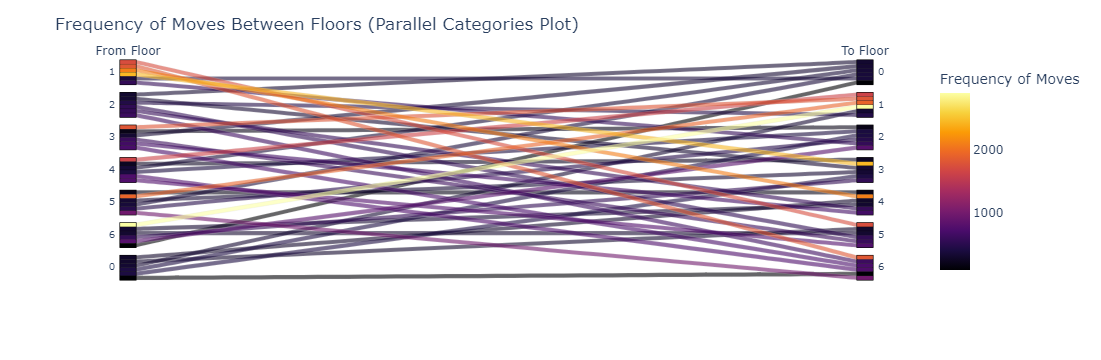

In [47]:
import pandas as pd
import plotly.express as px

# Assuming df_2 is already loaded with the data
df = df_2

# Filter out rows with invalid floor values and exclude movements from the same floor
df = df[(df['start_floor'] != -1) & (df['end_floor'] != -1) & (df['start_floor'] != df['end_floor'])]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df['start_floor'], df['end_floor'])

# Melt the pivot table to create the long format data
parallel_data = pivot_table.reset_index().melt(id_vars='start_floor', value_vars=pivot_table.columns,
                                               var_name='end_floor', value_name='frequency')

# Filter out zero frequencies for cleaner plot
parallel_data = parallel_data[parallel_data['frequency'] > 0]

# Create a parallel categories plot
fig_parallel_cat = px.parallel_categories(parallel_data,
                                          dimensions=['start_floor', 'end_floor'],
                                          color="frequency",
                                          color_continuous_scale='Inferno',
                                          labels={'start_floor': 'From Floor', 'end_floor': 'To Floor',
                                                  'frequency': 'Frequency of Moves'})

# Update layout for better readability and customize hover text
fig_parallel_cat.update_layout(title="Frequency of Moves Between Floors (Parallel Categories Plot)",
                               hoverlabel=dict(
                                   bgcolor="white",
                                   font_size=12,
                                   font_family="Rockwell",
                                   bordercolor="black"
                               ))

# Show the parallel categories plot
fig_parallel_cat.show()
fig_parallel_cat.write_html('elev_2_freq_analysis_parking_floor_1(sankey).html')


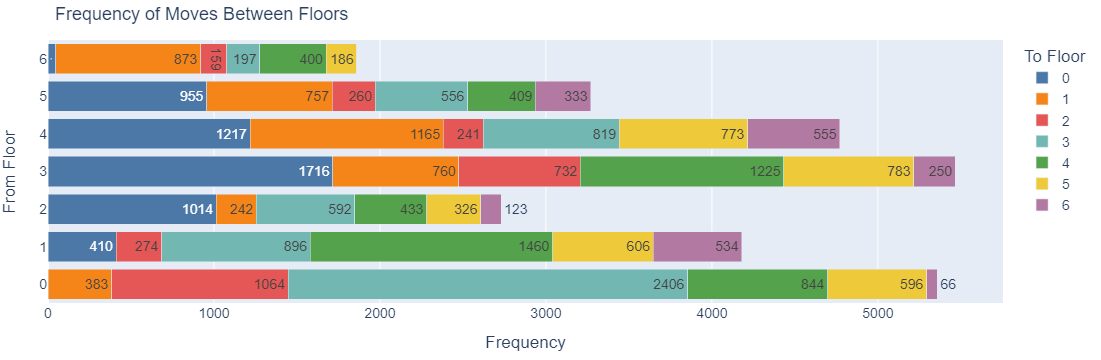

In [48]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = r"elevator_1.xlsx"
df_1 = pd.read_excel(file_path, sheet_name='Sheet1')

# Add condition to exclude movements from the same floor
df_1 = df_1[(df_1['start_floor'] != -1) & (df_1['end_floor'] != -1)]
df_1 = df_1[df_1['start_floor'] != df_1['end_floor']]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df_1['start_floor'], df_1['end_floor'])

# Convert the pivot table to a DataFrame suitable for a stacked bar graph
stacked_data = pivot_table.reset_index().melt(id_vars='start_floor', var_name='end_floor', value_name='frequency')

# Create a horizontal stacked bar graph using the converted data
fig = px.bar(stacked_data,
             x='frequency',
             y='start_floor',
             color='end_floor',
             labels={'start_floor': 'From Floor', 'end_floor': 'To Floor', 'frequency': 'Frequency'},
             title="Frequency of Moves Between Floors",
             text_auto=True,
             orientation='h',
             hover_data={'start_floor': False},
             color_discrete_sequence=px.colors.qualitative.T10)  # Using Pastel1 color palette for a softer look

# Update layout for better readability and aesthetics
fig.update_layout(
    barmode='stack',
    xaxis_title='Frequency',
    yaxis_title='From Floor',
    yaxis=dict(tickmode='linear', tick0=0, dtick=1),
    font=dict(family="Arial", size=14),
    title_font=dict(size=18, family="Arial"),
    legend_title_text='To Floor',
    margin=dict(l=40, r=40, t=40, b=40)  # Adjusting margins
)

# Show or save the plot
fig.show()
# Save the plot as HTML
fig.write_html('HC_ID 45031.html')


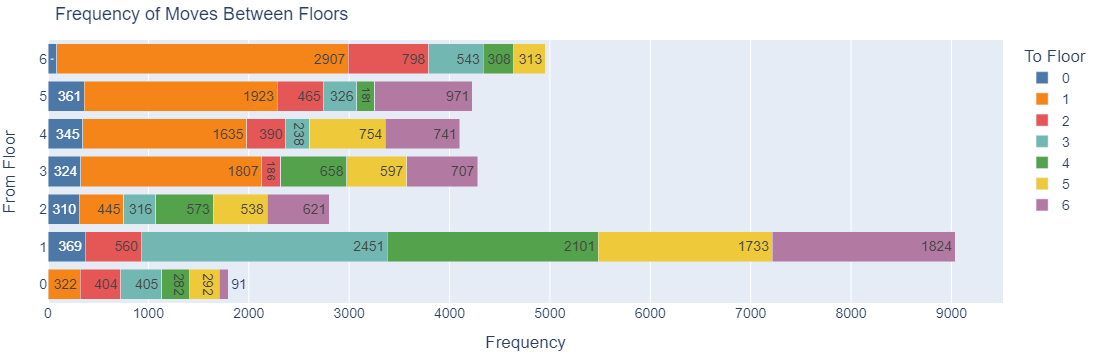

In [49]:
import pandas as pd
import plotly.express as px

# Load the Excel file
file_path = r"elevator_2.xlsx"
df_1 = pd.read_excel(file_path, sheet_name='Sheet1')

# Add condition to exclude movements from the same floor
df_1 = df_1[(df_1['start_floor'] != -1) & (df_1['end_floor'] != -1)]
df_1 = df_1[df_1['start_floor'] != df_1['end_floor']]

# Create a pivot table to calculate the frequency of moves between floors
pivot_table = pd.crosstab(df_1['start_floor'], df_1['end_floor'])

# Convert the pivot table to a DataFrame suitable for a stacked bar graph
stacked_data = pivot_table.reset_index().melt(id_vars='start_floor', var_name='end_floor', value_name='frequency')

# Create a horizontal stacked bar graph using the converted data
fig = px.bar(stacked_data,
             x='frequency',
             y='start_floor',
             color='end_floor',
             labels={'start_floor': 'From Floor', 'end_floor': 'To Floor', 'frequency': 'Frequency'},
             title="Frequency of Moves Between Floors",
             text_auto=True,
             orientation='h',
             hover_data={'start_floor': False},
             color_discrete_sequence=px.colors.qualitative.T10)  # Using Pastel1 color palette for a softer look

# Update layout for better readability and aesthetics
fig.update_layout(
    barmode='stack',
    xaxis_title='Frequency',
    yaxis_title='From Floor',
    yaxis=dict(tickmode='linear', tick0=0, dtick=1),
    font=dict(family="Arial", size=14),
    title_font=dict(size=18, family="Arial"),
    legend_title_text='To Floor',
    margin=dict(l=40, r=40, t=40, b=40)  # Adjusting margins
)

# Show or save the plot
fig.show()
fig.write_html('HC_ID 45030.html')
